# You're Approved! Car Loan T-Testing

In this assignment, you will the age of loan applicants in a dataset to ensure that there is no statistically significant difference between the ages of applicants that are approved and not approved. In the dataset you will perform a series of calculations to understand Age in terms of its descriptive statistics, as well as perform t-testing on approved and rejected applicants to test whether they are significantly different with regards to their ages.

In [1]:
# TODO: Import the required libaries
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problem Set 1: Feature Correlation

We will start by importing our data from `Training_Data.csv` using `read_csv()`, then calculating the correlation for the numerical columns of data.

- Use `.read_csv()` to import the `Training_Data.csv` file into a variable `training_data`. Also, make sure to set the index column to `"Id"`.
- Use `.corr()` on the `training_data` to calculate the dataframe of correlations. 
- Use `.heatmap()` from the `sns` library with the `.corr()` result to make a plot of the correlations. Make sure to set the vmin and vmax to -1, and 1, respectively.

In [2]:
# TODO: Read the required dataset with the correct index orientation
training_data = pd.read_csv('Training_Data.csv', index_col="Id")

In [3]:
# TODO: Preview the data
training_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# TODO: Construct a dataframe of correlations on the training dataset
training_data.corr()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<AxesSubplot:>

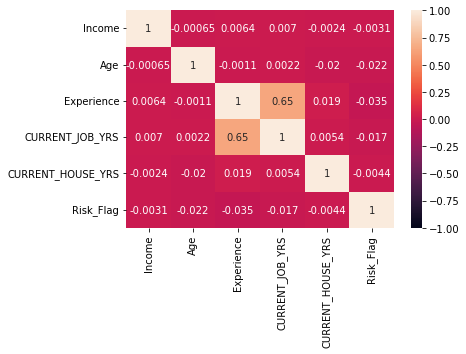

In [5]:
# TODO: Construct a heatmap to plot the map of correlations. 
sns.heatmap(training_data.corr(), vmin=-1, vmax=1, annot=True)

**Do any of the features have significant correlation with `Risk_Flag`? If so, what could that mean for your data?**

> The output in the heat map is over 0.05 in the correlation with the risk_flag. 
> This tell me there might be some features and significant correlation with Risk_Flag.

## Part II: Age Feature Analysis

In the next step, we would like to specifically analyze this model's behavior with respect to age. We'll first need to slice our `training_data` dataframe down to Age and Risk_Flag before taking a random sample to begin evaluating other descriptive statistics

- Create a new `age_risk` variable by slicing only the `Age` and `Risk_Flag` columns from your dataset
- Preview `age_risk` using .head()
- Take a random sample of 5000 rows by using `.sample()`, and store into a variable `sample`.
- Plot your `sample` using `.plot()`. Specifically, you should use a density plot to get an idea of the shape of the distribution.
- Does your plot appear normally distributed? Answer the question below your plot.
- Prove whether your `sample` is normal by using the `.shapiro()` function from the statsmodels library.
- What is the p-value of the result? Using a level of significance of 0.05, does the p-value indicate that this data likely is or is not normally distributed? (hint, you may need to first consider the null and alternative hypotheses.) Answer below your shapiro test result.
 

In [6]:
# TODO: Create the age risk variable 
age_risk = training_data[["Age", "Risk_Flag"]]

In [7]:
# TODO: Preview the age_risk data
age_risk.head()

,Age,Risk_Flag
Id,,
1,23,0
2,40,0
3,66,0
4,41,1
5,47,1


In [8]:
# TODO: Create a sample of 5000 records in the dataset 
sample = age_risk.sample(n=5000)

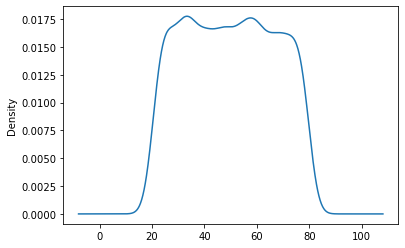

In [9]:
# TODO: Create a density plot of the sample dataset
sample["Age"].plot(kind="density")
plt.show()

In [10]:
# TODO: Complete a Shapiro test on the dataset
stats.shapiro(sample["Age"])

ShapiroResult(statistic=0.9544317126274109, pvalue=6.641554740949148e-37)

At the level of significance of 0.05, my p-value is greater than alpha level, so I reject the hypothesis. I would conclude that my sample is not normally distributed.

## Part III: T-testing

In our last step, we created a dataframe `sample` to work with. In this section, we will split the `sample` into two smaller sets of rows, those who are `approved` and `rejected` during the process. Our goal is to determine whether the mean ages of the two groups differ in a statistiacally significant way.

- Create dataframes `approved` and `rejected` by filtering for rows where the Risk_Flag is equal to 0 or 1, respectively.
- Calculate the mean for each of the two groups
- How much do these means differ by? Do you have enough information to know whether this is statistically significant? Answer below your means calculations.
- Calculate the number of rows in each of the two groups by using `.shape`
- Trim the larger of the two groups down to the same number of rows as the smaller of the two groups. For example, if your split was 3000 approved and 2000 rejected, make a new variable `subset_approved` that contains 2000 rows of the approved group.

In [11]:
# TODO: Preview sample dataset
sample.head()

,Age,Risk_Flag
Id,,
173000,31,0
99298,43,0
215862,53,0
248546,28,0
36017,38,1


In [12]:
# TODO: Extract the approved and rejected records into distinct datasets 
approved = sample[sample['Risk_Flag']==0]
rejected = sample[sample['Risk_Flag']==1]

In [13]:
# TODO: Preview the approved records
approved.head()

,Age,Risk_Flag
Id,,
173000,31,0
99298,43,0
215862,53,0
248546,28,0
175801,76,0


In [14]:
# TODO: Preview the rejected records
rejected.head()

,Age,Risk_Flag
Id,,
36017,38,1
47141,26,1
213974,54,1
228474,23,1
39842,33,1


In [15]:
# TODO: Calculate the mean age of the approved records
approved_mean = approved['Age'].mean()
approved_mean

49.89111617312073

In [16]:
# TODO: Calculate the mean age of the rejected records
rejected_mean = rejected['Age'].mean()
rejected_mean

48.8672131147541

In [17]:
# TODO: Calculate the mean difference
mean_difference =   approved_mean - rejected_mean
mean_difference

1.0239030583666278

Can we determine if there is a significant difference between the two samples based on the above calculation? Why or why not?

> The means alone cannot establish whether the two samples vary significantly. To execute a statistical test and assess whether the means deviate significantly, sample size and standard deviation are needed.

> There is a difference between the means -- but this cannot be interpreted as a signal of statistical difference without a statistical test. 

In [18]:
# TODO: Determine the shape of the approved records
#approved.shape
approved_count = approved.shape[0]
approved_count

4390

In [19]:
# TODO: Determine the shape of the rejected records
#rejected.shape
rejected_count = rejected.shape[0]
rejected_count

610

In [20]:
# TODO: Trim the larger of the two datasets to match the shape of the smaller dataset
subset_approved = approved.sample(n=rejected_count,replace=True)
subset_rejected = rejected.sample(n=rejected_count,replace=True)

Ensure that you have created a variable `subset_approved` or `subset_rejected`. In the next step, we will use the two groups that are equal size to create a new pandas dataframe, then perform a t-test to understand our results.

- Create a dataframe `age_df` by using `pd.DataFrame`, and a dictionary with two keys for each respective groups' values. For example: `"Approved_age":subset_approved.Age.values.` You may want to preview your result using `.head()` before moving on.
- Create a density plot for the `age_df`, which will allow you to see the densities of the two groups' frequency distribution of age.

In [21]:
# TODO: Construct a single dataframe with both the approved and rejected age values
age_df = pd.DataFrame({ 
    "Approved_age":subset_approved.Age.values,
    "Rejected_age":subset_rejected.Age.values
})

In [22]:
# TODO: Preview the records in the constructed dataframe
age_df.head()

,Approved_age,Rejected_age
0,23,53
1,59,62
2,79,63
3,48,27
4,78,76


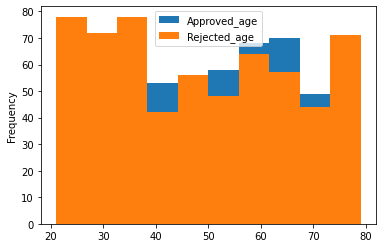

In [23]:
# TODO: Construct a histogram plot to look at the overlap of the differences
age_df.plot(kind="hist")
plt.show()

Create your density plot here!

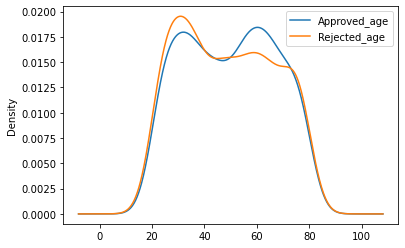

In [24]:
# TODO: Construct a density plot to look at the overlap of the differences
age_df.plot(kind="density")
plt.show()

Finally, we will perform a t-test to understand whether the difference in means is significant. We will define our hypotheses, our alpha level, and then run the test. Afterwards we will use our calculated p-value to interpret our results.

- Define the null and alternative hypotheses in the box below, and select an alpha value to use for your test.
- Use `.ttest_ind()` to test the differences between the means in approved and rejected ages.
- Interpret the result of the t-test, including information on the p-value, the level of significance, whether you reject or fail to reject the null hypothesis, and what that means for your dataaset.

Null Hypothesis (H<sub>0</sub>): The Approved and Rejected ages **do not** differ in their ages to a statistically significant degree

Alternative Hypothesis (H<sub>A</sub>): The Approved and Rejected ages differ in their ages in a statistically significant way

I will use a level of significance of 0.05.

In [25]:
# TODO: Calculate the p-value using a t-test on the age of approved vs rejected applicants 
stats.ttest_ind(age_df['Approved_age'],age_df['Rejected_age'])

Ttest_indResult(statistic=1.0120605009820103, pvalue=0.31171012873391624)

Can we determine if there is a significant difference between the two samples based on the above calculation? Why or why not?

> The above calculation cannot tell whether the two samples vary significantly. The p-value of 0.3117 exceeds the 0.05 significance threshold. Which is why, we cannot reject the null hypothesis, indicating that the two samples are not significantly different.  